In [1]:
"""a toy stroop model
"""
import numpy as np 
import psyneulink as pnl 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

sns.set(
    style='white', context='talk', palette='colorblind',
    font_scale=1, rc={"lines.linewidth": 2}
)
# sns.palplot(sns.color_palette('colorblind', n_colors=6))

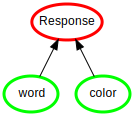

In [3]:
stroop = pnl.Composition()

# input layers  
color_inp = pnl.TransferMechanism(
    default_variable=[0, 0], function=pnl.Linear(slope=1), name="color")
word_inp = pnl.TransferMechanism(
    default_variable=[0, 0], function=pnl.Linear(slope=1.5), name="word")
# output layer 
response = pnl.TransferMechanism(
    default_variable=[0, 0], function=pnl.Linear(slope=1), name="Response")

# Place mechanisms and projections in composition
stroop.add_linear_processing_pathway(pathway = [color_inp, response])
stroop.add_linear_processing_pathway(pathway = [word_inp, response])

stroop.show_graph(output_fmt = 'jupyter')

In [4]:
# all stimuli 
red = [1, 0]
green = [0, 1]
null = [0, 0]

input_control = {color_inp: red,  word_inp: null}
input_conflict = {color_inp: red,  word_inp: green}
input_congruent = {color_inp: red,  word_inp: red}

all_stimuli = [input_control, input_conflict, input_congruent]

In [5]:
# collect responses for all conditions 
responses = []
for stimuli in all_stimuli: 
    responses.append(stroop.run(stimuli))
responses = np.squeeze(responses)    

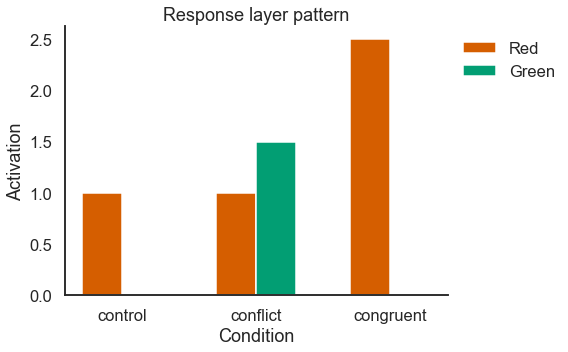

In [11]:
# prep data for plotting
colpal = sns.color_palette('colorblind', n_colors=4)[-2:]
all_conditions = ['control', 'conflict', 'congruent']
n_conditions = len(all_conditions)
index = np.arange(n_conditions)
bar_width = 0.3

# plot
f, ax = plt.subplots(1,1,figsize=(8,5))
ax.bar(
    index, responses[:,0], 
    bar_width, color=colpal[1], label='Red'
) 
ax.bar(
    index + bar_width, responses[:,1], 
    bar_width, color=colpal[0], label='Green'
)

ax.set_xlabel('Condition')
ax.set_ylabel('Activation')
ax.set_title('Response layer pattern')
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(all_conditions)
ax.legend(bbox_to_anchor=(1,1),frameon=False)
 
plt.tight_layout()
sns.despine()

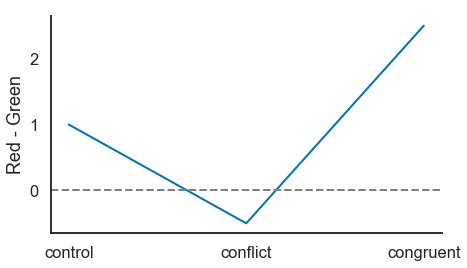

In [12]:
f, ax = plt.subplots(1,1,figsize=(7,4))
red_green_diff = responses[:,0]-responses[:,1]
ax.plot(red_green_diff)
ax.axhline(0, color='grey',linestyle='--')
ax.set_ylabel('Red - Green')
ax.set_xticks(range(n_conditions))
ax.set_xticklabels(all_conditions)
sns.despine()

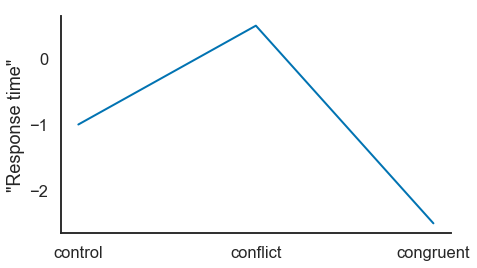

In [13]:
f, ax = plt.subplots(1,1,figsize=(7,4))
red_green_diff = responses[:,0]-responses[:,1]
ax.plot(-red_green_diff)
ax.set_ylabel('"Response time"')
ax.set_xticks(range(n_conditions))
ax.set_xticklabels(all_conditions)
sns.despine()